# Compare Experiments

In [1]:
# load packages
import pickle
import numpy as np
import pandas as pd

In [2]:
model = 'ICA'
kernel = 'linear'
nfolds = 10

In [7]:
explanations = list()
explanations_as_list = list()
predictions = list()

for i in range(nfolds):
    foldnum = i+1
    with open(f'{model}_{kernel}_explanations_fold{foldnum}.pkl', 'rb') as f:
        explanations += pickle.load(f)
        
    with open(f'{model}_{kernel}_explanations_aslist_fold{foldnum}.pkl', 'rb') as f:
        explanations_as_list += pickle.load(f)
        
    with open(f'{model}_{kernel}_predictions_fold{foldnum}.pkl', 'rb') as f:
        predictions += pickle.load(f)

In [15]:
explanations_as_list

[(2,
  [('blame', 0.1730170042076473),
   ('climate', 0.11517438255310206),
   ('change', 0.09776164977620387),
   ('matter', 0.0783244987362943),
   ('media', 0.07371234438084895),
   ('mainstream', 0.07271609207638495),
   ('suppose', 0.06983251898964442),
   ('coronavirus', -0.0681567944095457),
   ('time', -0.0663521146509426),
   ('decided', 0.02109691640293619),
   ('a', -0.002026000528462247),
   ('was', 0.0018379843637906972),
   ('only', 0.0017930346650220992),
   ('It', -0.0013810597279157227),
   ('to', 0.001323864120183771),
   ('the', -0.0009533693499184132),
   ('before', 0.0008702368857386112),
   ('of', -0.0007981883818237258),
   ('on', -8.283263880242613e-05),
   ('I', 7.557482039692145e-05)]),
 (6,
  [('Trump', 0.12047697658484689),
   ('Russia', 0.10027978970293841),
   ('pushing', 0.08313367165742001),
   ('trade', 0.08267504797806534),
   ('bio', 0.08062989512290394),
   ('targeting', 0.07939790955285883),
   ('claiming', 0.0753037963112874),
   ('weapon', 0.06819

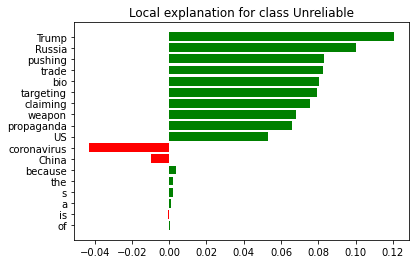

In [18]:
%matplotlib inline
fig = explanations[1][1].as_pyplot_figure()

Positive indicates association with unreliable class. Negative indicates association with reliable class.

# Join data with predictions & explanations

In [31]:
data = pd.read_csv('./data/COVID19_Dataset-CM-ZB-complete with sources_wTestFold.csv',
                   usecols=['Is_Unreliable', 'Tweet', 'Test_Fold'])
data.head()

,Is_Unreliable,Tweet,Test_Fold
0,1,We are living in scary times in Canada. Gov’t ...,3.0
1,1,"Just as bad in Canada. In fact, our government...",9.0
2,1,It was only a matter of time before the mainst...,1.0
3,1,Russia's taking no chances: Foreigners infecte...,5.0
4,1,Although there is now a presumptive confirmed ...,8.0


In [43]:
idx = [tup[0] for tup in predictions]
preds = [tup[1] for tup in predictions]
preds_df = pd.DataFrame({f'{model}_Pred': preds}, index=idx)
data = data.merge(preds_df, right_index=True, left_index=True)
data

,Is_Unreliable,Tweet,Test_Fold,ICA_Pred
0,1,We are living in scary times in Canada. Gov’t ...,3.0,1
1,1,"Just as bad in Canada. In fact, our government...",9.0,1
2,1,It was only a matter of time before the mainst...,1.0,1
3,1,Russia's taking no chances: Foreigners infecte...,5.0,1
4,1,Although there is now a presumptive confirmed ...,8.0,0
...,...,...,...,...
555,0,BREAKING: Harvard classes will move online sta...,2.0,0
556,0,Singularity University is hosting a FREE Virtu...,1.0,1
557,0,Coronavirus: how does it spread and what are t...,9.0,0
558,0,Stanford just cancelled classes for the rest o...,5.0,0


In [44]:
idx = [tup[0] for tup in explanations_as_list]
exp_list = [tup[1] for tup in explanations_as_list]
exp_list_df = pd.DataFrame({f'{model}_ExpList': exp_list}, index=idx)
data = data.merge(exp_list_df, right_index=True, left_index=True)
data

,Is_Unreliable,Tweet,Test_Fold,ICA_Pred,ICA_ExpList
0,1,We are living in scary times in Canada. Gov’t ...,3.0,1,"[(refuses, 0.15353340526655912), (times, -0.06..."
1,1,"Just as bad in Canada. In fact, our government...",9.0,1,"[(blaming, 0.1096221645256913), (bad, 0.107458..."
2,1,It was only a matter of time before the mainst...,1.0,1,"[(blame, 0.1730170042076473), (climate, 0.1151..."
3,1,Russia's taking no chances: Foreigners infecte...,5.0,1,"[(new, -0.15174495281519598), (Russia, 0.11057..."
4,1,Although there is now a presumptive confirmed ...,8.0,0,"[(case, -0.057216432663796744), (Ontario, -0.0..."
...,...,...,...,...,...
555,0,BREAKING: Harvard classes will move online sta...,2.0,0,"[(President, 0.09007118022675864), (online, 0...."
556,0,Singularity University is hosting a FREE Virtu...,1.0,1,"[(March, -0.07703008868958512), (facts, 0.0685..."
557,0,Coronavirus: how does it spread and what are t...,9.0,0,"[(COVID, -0.21961514338772603), (19, -0.210030..."
558,0,Stanford just cancelled classes for the rest o...,5.0,0,"[(contained, 0.06039851782597897), (COVID19, -..."


# Define unreliable lexicon

In [51]:
with open('./data/word_embeddings/tweet_vocab_list', 'rb') as f:
    vocab = pickle.load(f)
len(vocab)

2327

In [50]:
vocab_list = list()
#exp_list
for tweet in exp_list:
    for word in tweet:
        vocab_list.append(word[0])
vocab_list = list(set(vocab_list))
len(vocab_list)

3223

In [ ]:
# table 1 words only
t1 = [
    'blame',
    'accuse',
    'refuse',
    'catastrophe',
    'chaos',
    'evil',
    'fight',
    'danger',
    'hysteria',
    'panic',
    'paranoia',
    'laugh',
    'stupidity',
    'hear',
    'see',
    'feel',
    'suppose',
    'perceive',
    'look',
    'appear',
    'suggest',
    'believe',
    'pretend',
    'martial',
    'kill',
    'die',
    'weapon',
    'weaponizing',
    'ussr',
    'japan',
    'fukushima',
    'chernobyl',
    'wuhan',
    'china',
    'foreigners',
    'cats',
    'dogs',
    'i',
    'me',
    'mine',
    'my',
    'you',
    'your',
    'we',
    'our',
    'propaganda',
    'fake',
    'conspiracy',
    'claim',
    'misleading',
    'hoax',
    'cure',
    'breakthrough',
    'bitch',
    'wtf',
    'dogbreath',
    'zombie',
    'junkies',
    'hell',
    'screwed',
    'secular',
    'bible',
    'maga',
    'magat',
    'genetic',
    'hillary',
    'chinese',
    'fundamentalist',
    'market',
    'communist',
    'nazi',
    'stock',
    'economy',
    'money',
    'cost',
    'costs',
    'election',
    'campaign',
    'presidential',
    'impeachment',
    'rallies',
    'base',
    'trump',
    'war',
    'iran'
]
t1_vocab = [el for el in vocab if el.lower() in t1]

In [ ]:
# table 1 words plus manual additions
t1PlusManual = [
    'blame',
    'accuse',
    'refuse',
    'catastrophe',
    'emergency',
    'chaos',
    'crisis',
    'evil',
    'fight',
    'danger',
    'hysteria',
    'panic',
    'paranoia',
    'fear',
    'fears',
    'laugh',
    'stupidity',
    'hear',
    'see',
    'feel',
    'suppose',
    'perceive',
    'look',
    'appear',
    'suggest',
    'believe',
    'believed',
    'pretend',
    'martial',
    'kill',
    'killing',
    'kills',
    'killed',
    'die',
    'death',
    'dies',
    'dying',
    'dead',
    'died',
    'threat',
    'weapon',
    'weaponize',
    'weaponizing',
    'knife',
    'ussr',
    'japan',
    'chernobyl',
    'wuhan',
    'china',
    'foreigners',
    'cat',
    'cats',
    'dog',
    'dogs',
    'i',
    'me',
    'mine',
    'my',
    'you',
    'yours',
    'your',
    'we',
    'our',
    'propaganda',
    'fake',
    'conspiracy',
    'claim',
    'claims',
    'claiming',
    'claimed',
    'misleading',
    'hoax',
    'cure',
    'breakthrough',
    'bitch',
    'wtf',
    'dogbreath',
    'zombie',
    'junkies',
    'hell',
    'screwed',
    'fuck',
    'fucking',
    'fucked',
    'fuckin',
    'wth',
    'secular',
    'bible',
    'maga',
    'magat',
    'genetic',
    'hillary',
    'clinton',
    'fundamentalist',
    'market',
    'communist',
    'nazi',
    'stock',
    'bank',
    'economy',
    'economic',
    'money',
    'cost',
    'costs',
    'election',
    'campaign',
    'presidential',
    'impeachment',
    'rally',
    'rallies',
    'base',
    'president',
    'trump',
    'war',
    'wwiii',
    'asteroid',
    'banknotes',
    'dangerous',
    'invent',
    'invented',
    'iran',
    'lie',
    'lies',
    'lying',
    'lied',
    'liar',
    'liars',
    'lmfao',
    'lmfaoooooo',
    'misinformation',
    'news',
    'media',
    'financial',
    'propagandawars',
    'antidote'
]
t1_manual_vocab = [el for el in vocab if el.lower() in t1PlusManual]

In [ ]:
# stemming on table 1 words
from nltk.stem.porter import *
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in t1]
stems = list(set(stems))
t1_stems = [el for el in vocab if stemmer.stem(el).lower() in stems]

In [ ]:
# stemming on table 1 words plus manual additions
stems = [stemmer.stem(word) for word in t1PlusManual]
stems = list(set(stems))
t1_manual_stems = [el for el in vocab if stemmer.stem(el).lower() in stems]

# Compute evaluation metrics

- Accuracy: (unreliable words w pos coef + reliable words w neg coef) / (num words in tweet)
- Recall (pos class): (unreliable words w pos coef) / (total num unreliable words in tweet)
- Precision (pos class): (words w pos coef that are unreliable) / (total num words in tweet w pos coef)

## No Disaggregation

In [ ]:
def expl_accuracy(list_tuples):

In [ ]:
def expl_recall(list_tuples):

In [ ]:
def expl_precision(list_tuples):

## Correctly Predicted

## Incorrectly Predicted

## Experiment 1: Table 1 words

### Disaggregated by correctness of prediction

#### Correctly predicted

In [16]:
# get filtered vocab based on analysis words
filtered_vocab = [el for el in vocab_correct if el.lower() in t1]

In [17]:
# make dictionary from filtered vocab
myDict = dict()

for i in range(len(filtered_vocab)):
    myDict[filtered_vocab[i]] = i

In [18]:
# matrix of class associations of filtered vocab
my_matrix = np.zeros((len(correctPred), len(vocab_correct)))

for i in range(len(correctPred)):
    expl = correctPred[i]
    for j in range(len(expl)):
        word = expl[j][0]
        val = expl[j][1]
        
        if word in filtered_vocab:
            if val > 0:
                my_matrix[i, myDict[word]] = 1

            if val < 0:
                my_matrix[i, myDict[word]] = -1

In [19]:
# no penalty
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        if el > 0:
            rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [20]:
totalNonZero

206

In [21]:
np.array(tweet_scores).mean()

0.7320261437908496

In [22]:
# penalty for wrong class association of word
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [23]:
np.array(tweet_scores).mean()

0.7320261437908496

#### Incorrectly predicted

In [24]:
# get filtered vocab based on analysis words
filtered_vocab = [el for el in vocab_wrong if el.lower() in t1]

In [25]:
# make dictionary from filtered vocab
myDict = dict()

for i in range(len(filtered_vocab)):
    myDict[filtered_vocab[i]] = i

In [26]:
# matrix of class associations of filtered vocab
my_matrix = np.zeros((len(wrongPred), len(vocab_wrong)))

for i in range(len(wrongPred)):
    expl = wrongPred[i]
    for j in range(len(expl)):
        word = expl[j][0]
        val = expl[j][1]
        
        if word in filtered_vocab:
            if val > 0:
                my_matrix[i, myDict[word]] = 1

            if val < 0:
                my_matrix[i, myDict[word]] = -1

In [27]:
# no penalty
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        if el > 0:
            rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [28]:
np.array(tweet_scores).mean()

0.6296296296296297

In [29]:
# penalty for wrong class association of word
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [30]:
np.array(tweet_scores).mean()

0.6296296296296297

### Aggregated

In [31]:
# get filtered vocab based on analysis words
filtered_vocab = [el for el in vocab_list if el.lower() in t1]

In [32]:
filtered_vocab

['you',
 'we',
 'Trump',
 'You',
 'your',
 'look',
 'TRUMP',
 'We',
 'My',
 'fight',
 'evil',
 'Iran',
 'chaos',
 'refuse',
 'me',
 'Misleading',
 'junkies',
 'Zombie',
 'Market',
 'market',
 'stock',
 'Wuhan',
 'China',
 'conspiracy',
 'panic',
 'Stupidity',
 'Hell',
 'Paranoia',
 'weaponizing',
 'hoax',
 'campaign',
 'my',
 'I',
 'our',
 'rallies',
 'base',
 'screwed',
 'weapon',
 'Rallies',
 'laugh',
 'cure',
 'DIE',
 'Hoax',
 'economy',
 'Chinese',
 'see',
 'pretend',
 'suggest',
 'cost',
 'Communist',
 'kill',
 'hysteria',
 'Fake',
 'war',
 'impeachment',
 'Conspiracy',
 'Cure',
 'FAKE',
 'fake',
 'ECONOMY',
 'MARKET',
 'STOCK',
 'money',
 'Chernobyl',
 'USSR',
 'Fukushima',
 'Japan',
 'KILL',
 'MY',
 'feel',
 'believe',
 'MAGA',
 'Propaganda']

In [33]:
len(filtered_vocab)

73

In [34]:
# make dictionary from filtered vocab
myDict = dict()

for i in range(len(filtered_vocab)):
    myDict[filtered_vocab[i]] = i

In [35]:
# matrix of class associations of filtered vocab
my_matrix = np.zeros((len(explanations), len(vocab_list)))

for i in range(len(explanations)):
    expl = explanations[i]
    for j in range(len(expl)):
        word = expl[j][0]
        val = expl[j][1]
        
        if word in filtered_vocab:
            if val > 0:
                my_matrix[i, myDict[word]] = 1

            if val < 0:
                my_matrix[i, myDict[word]] = -1

In [36]:
# no penalty
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        if el > 0:
            rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [37]:
totalNonZero

232

In [38]:
np.array(tweet_scores).mean()

0.7166666666666667

In [39]:
# penalty for wrong class association of word
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [40]:
np.array(tweet_scores).mean()

0.7166666666666667

## Experiment 2:  Table 1 + manual additions

### Disaggregated by correctness of prediction

#### Correctly predicted

In [42]:
# get filtered vocab based on analysis words
filtered_vocab = [el for el in vocab_correct if el.lower() in t1PlusManual]

In [43]:
# make dictionary from filtered vocab
myDict = dict()

for i in range(len(filtered_vocab)):
    myDict[filtered_vocab[i]] = i

In [44]:
# matrix of class associations of filtered vocab
my_matrix = np.zeros((len(correctPred), len(vocab_correct)))

for i in range(len(correctPred)):
    expl = correctPred[i]
    for j in range(len(expl)):
        word = expl[j][0]
        val = expl[j][1]
        
        if word in filtered_vocab:
            if val > 0:
                my_matrix[i, myDict[word]] = 1

            if val < 0:
                my_matrix[i, myDict[word]] = -1

In [45]:
# no penalty
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        if el > 0:
            rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [46]:
totalNonZero

301

In [47]:
np.array(tweet_scores).mean()

0.8235294117647058

In [48]:
# penalty for wrong class association of word
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [49]:
np.array(tweet_scores).mean()

0.8235294117647058

#### Incorrectly predicted

In [50]:
# get filtered vocab based on analysis words
filtered_vocab = [el for el in vocab_wrong if el.lower() in t1PlusManual]

In [51]:
# make dictionary from filtered vocab
myDict = dict()

for i in range(len(filtered_vocab)):
    myDict[filtered_vocab[i]] = i

In [52]:
# matrix of class associations of filtered vocab
my_matrix = np.zeros((len(wrongPred), len(vocab_wrong)))

for i in range(len(wrongPred)):
    expl = wrongPred[i]
    for j in range(len(expl)):
        word = expl[j][0]
        val = expl[j][1]
        
        if word in filtered_vocab:
            if val > 0:
                my_matrix[i, myDict[word]] = 1

            if val < 0:
                my_matrix[i, myDict[word]] = -1

In [53]:
# no penalty
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        if el > 0:
            rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [54]:
np.array(tweet_scores).mean()

0.7777777777777778

In [55]:
# penalty for wrong class association of word
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [56]:
np.array(tweet_scores).mean()

0.7777777777777778

### Aggregated

In [57]:
# get filtered vocab based on analysis words
filtered_vocab = [el for el in vocab_list if el.lower() in t1PlusManual]

In [58]:
filtered_vocab

['you',
 'we',
 'President',
 'Trump',
 'You',
 'your',
 'look',
 'media',
 'TRUMP',
 'We',
 'WWIII',
 'dying',
 'asteroid',
 'BANKNOTES',
 'dangerous',
 'economic',
 'My',
 'believed',
 'knife',
 'fight',
 'NEWS',
 'EMERGENCY',
 'evil',
 'invented',
 'Iran',
 'chaos',
 'refuse',
 'lying',
 'me',
 'Misleading',
 'junkies',
 'Zombie',
 'Market',
 'market',
 'stock',
 'Wuhan',
 'claims',
 'China',
 'conspiracy',
 'killing',
 'LMFAOOOOOO',
 'lied',
 'threat',
 'crisis',
 'Bank',
 'panic',
 'Stupidity',
 'Hell',
 'Death',
 'died',
 'Claims',
 'Fears',
 'Paranoia',
 'weaponizing',
 'hoax',
 'claiming',
 'Fear',
 'campaign',
 'Kills',
 'my',
 'death',
 'I',
 'fucked',
 'our',
 'rallies',
 'base',
 'screwed',
 'emergency',
 'weapon',
 'Rallies',
 'Clinton',
 'DEAD',
 'laugh',
 'cure',
 'DIE',
 'lie',
 'Hoax',
 'lies',
 'economy',
 'dog',
 'see',
 'news',
 'pretend',
 'misinformation',
 'suggest',
 'cost',
 'Communist',
 'fuckin',
 'kill',
 'fear',
 'financial',
 'fucking',
 'hysteria',
 'kill

In [59]:
len(filtered_vocab)

125

In [60]:
# make dictionary from filtered vocab
myDict = dict()

for i in range(len(filtered_vocab)):
    myDict[filtered_vocab[i]] = i

In [61]:
# matrix of class associations of filtered vocab
my_matrix = np.zeros((len(explanations), len(vocab_list)))

for i in range(len(explanations)):
    expl = explanations[i]
    for j in range(len(expl)):
        word = expl[j][0]
        val = expl[j][1]
        
        if word in filtered_vocab:
            if val > 0:
                my_matrix[i, myDict[word]] = 1

            if val < 0:
                my_matrix[i, myDict[word]] = -1

In [62]:
# no penalty
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        if el > 0:
            rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [63]:
totalNonZero

341

In [64]:
np.array(tweet_scores).mean()

0.8166666666666667

In [65]:
# penalty for wrong class association of word
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [66]:
np.array(tweet_scores).mean()

0.8166666666666667

## Experiment 3: Table 1 words + stemming

In [67]:
from nltk.stem.porter import *

In [121]:
# define dictionary
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in t1]
stems = list(set(stems))

In [122]:
stems

['catastroph',
 'appear',
 'mine',
 'look',
 'wuhan',
 'elect',
 'our',
 'china',
 'conspiraci',
 'bitch',
 'refus',
 'campaign',
 'suppos',
 'perceiv',
 'die',
 'feel',
 'believ',
 'i',
 'hoax',
 'evil',
 'cat',
 'accus',
 'ralli',
 'iran',
 'magat',
 'dog',
 'your',
 'ussr',
 'market',
 'my',
 'fake',
 'me',
 'hell',
 'secular',
 'cure',
 'wtf',
 'blame',
 'pretend',
 'fukushima',
 'nazi',
 'genet',
 'we',
 'chines',
 'chernobyl',
 'impeach',
 'you',
 'breakthrough',
 'trump',
 'suggest',
 'zombi',
 'presidenti',
 'chao',
 'kill',
 'hysteria',
 'danger',
 'hear',
 'base',
 'see',
 'mislead',
 'fight',
 'war',
 'money',
 'screw',
 'communist',
 'hillari',
 'martial',
 'maga',
 'cost',
 'panic',
 'paranoia',
 'propaganda',
 'junki',
 'economi',
 'laugh',
 'claim',
 'stock',
 'dogbreath',
 'bibl',
 'japan',
 'fundamentalist',
 'foreign',
 'weapon',
 'stupid']

### Disaggregated by correctness of prediction

#### Correctly predicted

In [123]:
# get filtered vocab based on analysis words
filtered_vocab = [el for el in vocab_correct if stemmer.stem(el).lower() in stems]

In [124]:
# make dictionary from filtered vocab
myDict = dict()

for i in range(len(filtered_vocab)):
    myDict[filtered_vocab[i]] = i

In [125]:
# matrix of class associations of filtered vocab
my_matrix = np.zeros((len(correctPred), len(vocab_correct)))

for i in range(len(correctPred)):
    expl = correctPred[i]
    for j in range(len(expl)):
        word = expl[j][0]
        val = expl[j][1]
        
        if word in filtered_vocab:
            if val > 0:
                my_matrix[i, myDict[word]] = 1

            if val < 0:
                my_matrix[i, myDict[word]] = -1

In [126]:
# no penalty
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        if el > 0:
            rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [127]:
totalNonZero

248

In [128]:
np.array(tweet_scores).mean()

0.7908496732026143

In [129]:
# penalty for wrong class association of word
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [130]:
np.array(tweet_scores).mean()

0.7908496732026143

#### Incorrectly predicted

In [131]:
# get filtered vocab based on analysis words
filtered_vocab = [el for el in vocab_wrong if stemmer.stem(el).lower() in stems]

In [132]:
# make dictionary from filtered vocab
myDict = dict()

for i in range(len(filtered_vocab)):
    myDict[filtered_vocab[i]] = i

In [133]:
# matrix of class associations of filtered vocab
my_matrix = np.zeros((len(wrongPred), len(vocab_wrong)))

for i in range(len(wrongPred)):
    expl = wrongPred[i]
    for j in range(len(expl)):
        word = expl[j][0]
        val = expl[j][1]
        
        if word in filtered_vocab:
            if val > 0:
                my_matrix[i, myDict[word]] = 1

            if val < 0:
                my_matrix[i, myDict[word]] = -1

In [134]:
# no penalty
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        if el > 0:
            rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [135]:
np.array(tweet_scores).mean()

0.7037037037037037

In [136]:
# penalty for wrong class association of word
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [137]:
np.array(tweet_scores).mean()

0.7037037037037037

### Aggregated

In [138]:
# get filtered vocab based on analysis words
filtered_vocab = [el for el in vocab_list if stemmer.stem(el).lower() in stems]

In [139]:
filtered_vocab

['stocks',
 'markets',
 'you',
 'we',
 'Trump',
 'You',
 'your',
 'look',
 'TRUMP',
 'We',
 'dying',
 'dangerous',
 'suggests',
 'My',
 'believed',
 'refused',
 'fight',
 'evil',
 'Iran',
 'chaos',
 'refuse',
 'me',
 'Misleading',
 'junkies',
 'Zombie',
 'Fundamentalists',
 'Market',
 'market',
 'stock',
 'Wuhan',
 'claims',
 'China',
 'conspiracy',
 'killing',
 'panic',
 'Stupidity',
 'Hell',
 'died',
 'Impeach',
 'Claims',
 'Paranoia',
 'weaponizing',
 'hoax',
 'claiming',
 'campaign',
 'Kills',
 'my',
 'I',
 'refuses',
 'our',
 'rallies',
 'base',
 'screwed',
 'weapon',
 'Rallies',
 'laugh',
 'cure',
 'DIE',
 'Hoax',
 'economy',
 'Chinese',
 'dog',
 'see',
 'pretend',
 'foreign',
 'suggest',
 'cost',
 'looks',
 'Communist',
 'kill',
 'Genetically',
 'hysteria',
 'seeing',
 'kills',
 'killed',
 'Fake',
 'Nazis',
 'war',
 'impeachment',
 'Killed',
 'conspiracies',
 'Conspiracy',
 'Cure',
 'FAKE',
 'fake',
 'ECONOMY',
 'MARKET',
 'STOCK',
 'elections',
 'Appearing',
 'money',
 'Chernob

In [140]:
len(filtered_vocab)

103

In [141]:
# make dictionary from filtered vocab
myDict = dict()

for i in range(len(filtered_vocab)):
    myDict[filtered_vocab[i]] = i

In [142]:
# matrix of class associations of filtered vocab
my_matrix = np.zeros((len(explanations), len(vocab_list)))

for i in range(len(explanations)):
    expl = explanations[i]
    for j in range(len(expl)):
        word = expl[j][0]
        val = expl[j][1]
        
        if word in filtered_vocab:
            if val > 0:
                my_matrix[i, myDict[word]] = 1

            if val < 0:
                my_matrix[i, myDict[word]] = -1

In [143]:
# no penalty
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        if el > 0:
            rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [144]:
totalNonZero

276

In [157]:
explanations[4]

[('the', 0.18333344931271334),
 ('unironic', 0.08000315840922398),
 ('NYT', 0.0628706663429014),
 ('Israelis', 0.0552038627822382),
 ('to', 0.04690367574080995),
 ('a', 0.04602305949756075),
 ('an', 0.045759952393576754),
 ('for', 0.04431488083685313),
 ('is', 0.04101546354827027),
 ('write', 0.03824383824026996),
 ('coronavirus', 0.038199697093392104),
 ('100', 0.03639169740551942),
 ('do', 0.03616979879774638),
 ('finding', 0.034518224116837234),
 ('likely', 0.030694457454544192),
 ('up', 0.03027192413811323),
 ('end', 0.026369508571869902),
 ('If', 0.026111692974492583),
 ('roughly', 0.024855474977400767),
 ('vaccine', 0.020854525884523082)]

In [145]:
np.array(tweet_scores).mean()

0.7777777777777778

In [146]:
# penalty for wrong class association of word
tweet_scores = []
totalNonZero = 0
for row in my_matrix:
    rowSum = 0
    nonZero = 0
    for el in row:
        rowSum += el
        if el != 0:
            nonZero += 1
            totalNonZero += 1
    
    if nonZero > 0:
        score = rowSum/nonZero
    else:
        score = 0
    
    tweet_scores.append(score)

In [147]:
np.array(tweet_scores).mean()

0.7777777777777778